# Development a data transforming algorithm

The Sure Tomorrow insurance company wants to protect its clients' data. Our task is to develop a data transforming algorithm that would make it hard to recover personal information from the transformed data. This is called data masking, or data obfuscation. We are also expected to prove that the algorithm works correctly. Additionally, the data should be protected in such a way that the quality of machine learning models doesn't suffer. We don't need to pick the best model. For development a new algorithm we need:
- construct a theoretical proof using properties of models and the given task;
- formulate an algorithm for this proof;
- check that the algorithm is working correctly when applied to real data.
We will use a simple method of data masking, based on an invertible matrix.

### Step 1.  Prepare the data

#### 1.1. Open the data file and study the general information

In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy.linalg import inv

*Read the file and save it to the variable*

In [2]:
df_insurance = pd.read_csv('insurance_us.csv')

*Print 5 random rows*

In [3]:
df_insurance.sample(n=5, random_state=12)

,Gender,Age,Salary,Family members,Insurance benefits
4506,0,30.0,34700.0,1,0
1273,1,28.0,57600.0,2,0
357,0,43.0,41200.0,2,1
478,1,53.0,32500.0,1,2
356,1,30.0,31600.0,3,0


Data description:
- Features: insured person's gender, age, salary, and number of family members.
- Target: number of insurance benefits received by the insured person over the last five years.

*Look at the general information of our dataset*

In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


*Use describe() method for more information*

In [5]:
df_insurance.describe() # use describe() method

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


*Check the duplicates*

In [6]:
# check the duplicates
df_insurance.duplicated().sum()

153

*Plot the distributions*

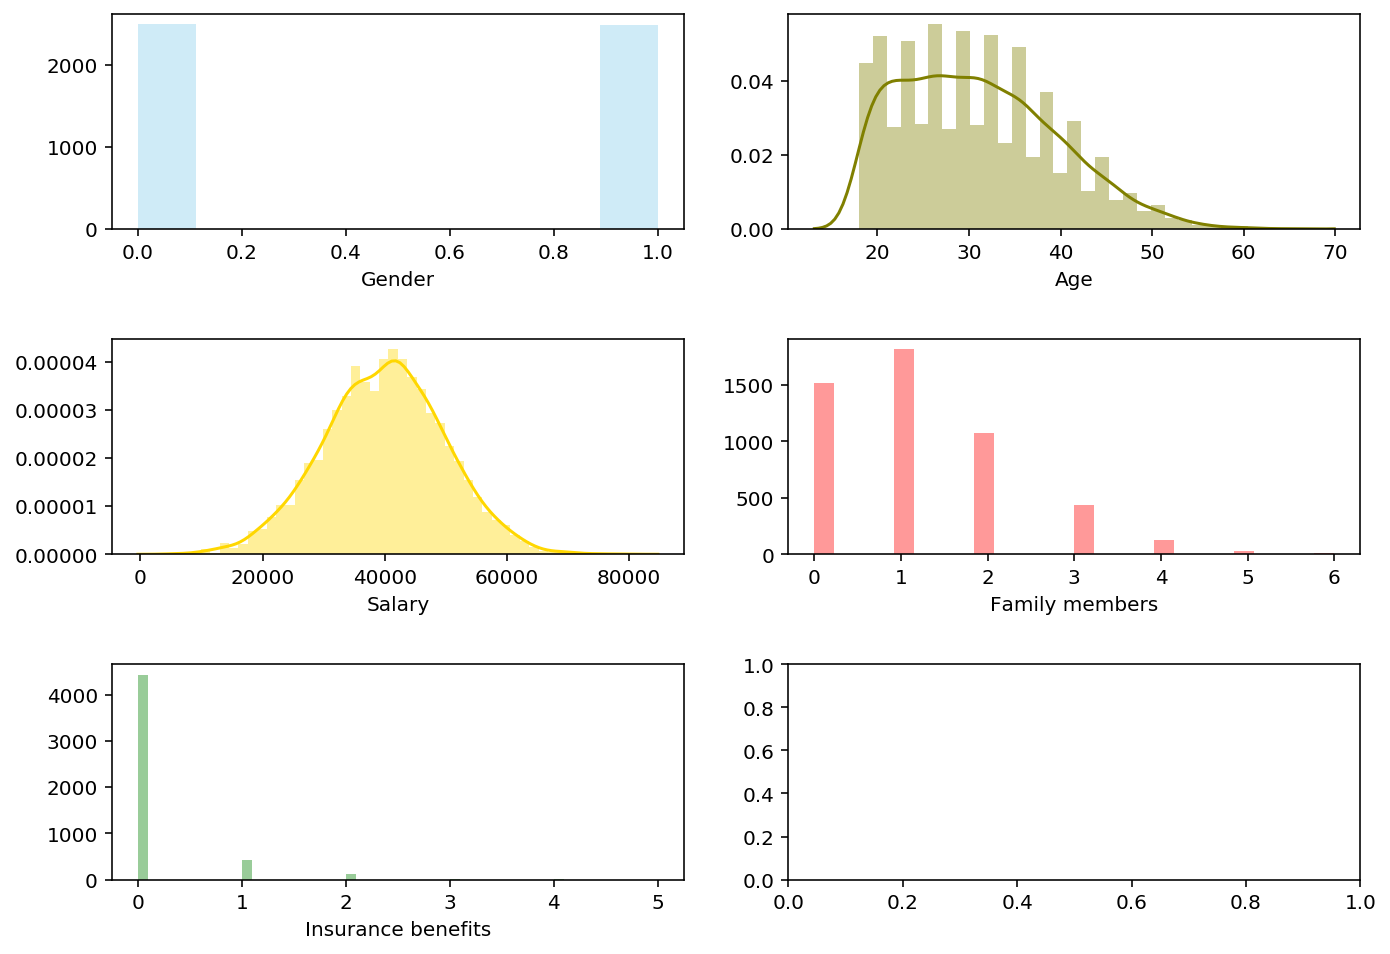

In [7]:
f, axes = plt.subplots(3, 2, figsize=(10, 7))
sns.distplot(df_insurance['Gender'], kde=False, color="skyblue", ax=axes[0, 0] )
sns.distplot(df_insurance['Age'], color="olive", ax=axes[0, 1])
sns.distplot(df_insurance['Salary'], color="gold", ax=axes[1, 0])
sns.distplot(df_insurance['Family members'], kde=False, color="red", ax=axes[1, 1])
sns.distplot(df_insurance['Insurance benefits'], kde=False, color="green", ax=axes[2, 0])
f.tight_layout(pad=2.0)

### Conclusion

We have the dataframe with 5000 rows and 5 columns:
- We haven't got missing values.
- We have 153 duplicates. Just drop it.

#### 1.2. Data preprocessing

*Drop duplicates*

In [8]:
df_insurance.drop_duplicates(inplace = True)

*Check the values*

In [9]:
df_insurance.shape[0]

4847

### Step 2.  Provide a theoretical proof based on the property of linear regression.

We'll use a simple method of data masking, based on an invertible matrix.  
Property of the linear regression is:
$$
w = (X^T * X)^{-1} * X^T * y
$$  

The inverse matrix for a square matrix A is a matrix A with a superscript -1 whose product with A is equal to the identity matrix (I). Multiplication can be performed in any order:
$$
A * A^{-1} = A^{-1} * A = I
$$
Where: 
$$
A * I = I * A = A
$$

Look how to create invertible matrix with numpy library. If you generate a random matrix with the numpy.random.normal() function, the probability of getting a non-invertible matrix is close to zero.

*Create invertible matrix*

In [10]:
# create random square matrix A with "np.random.normal" method
A = np.random.normal(size=(4, 4))
A

array([[-1.54387539, -1.19056086, -1.52339425, -0.08171513],
       [-0.72463783, -0.73328874,  0.57343268, -1.52308109],
       [-0.58231262, -0.57995264, -1.13565946, -0.50048473],
       [-0.71539279,  1.09345541,  0.30954583, -0.35496352]])

In [11]:
# create inverse martix for A
A_inv = inv(A)
A_inv

array([[-0.6817132 , -0.10981555,  0.74421273, -0.42117805],
       [-0.33111638, -0.2802774 ,  0.47042657,  0.61555932],
       [ 0.26198356,  0.34847388, -1.06913246, -0.04811064],
       [ 0.5823912 , -0.33817827, -0.98308535, -0.1140907 ]])

In [12]:
# check the reversibility A
A @ A_inv

array([[ 1.00000000e+00,  0.00000000e+00, -1.11022302e-16,
         0.00000000e+00],
       [ 1.11022302e-16,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.80411242e-16, -5.55111512e-17,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -2.77555756e-17,  0.00000000e+00,
         1.00000000e+00]])

We have a "w", which is a solution of an original equation:  
$$
w = argmin MSE(X * w, y)
$$
After the multiplication by invertible matrix it became:  
$$
w = argmin MSE(X * A * w, y)
$$
So the solution, i.e. argmin, will differ.  
Let's denote it with the uppercase W. We want to prove that
$$
MSE(X * w, y) = MSE(X * A * W, y)
$$

Main task here is to prove that $W = A^{-1} * w$.
    
As we know:

$$
w = (X^T * X)^{-1} * X^T * y 
$$

We can state that:

$$
W = ((X * A)^T * (X * A))^{-1} * (X * A)^T * y
$$

Now we can simplify second equation, with taking in consideration that $(X * A)^T = A^T * X^T$, and for square invertible matrices $(A * B)^{-1} = B^{-1} * A^{-1}$. If we do correctly everything at the end we'll receive that $W=A^{-1} * w$ and this will complete our proof.

Transform W:
$$
W = ((X * A)^T * (X * A))^{-1} * (X * A)^T * y
$$
$$
W = ((A^T * X^T) * (X * A))^{-1} * A^T * X^T * y
$$  

delete the brackets  

$$
W = (A^T * X^T * X * A)^{-1} * A^T * X^T * y
$$
$$
W = A^{-1} * X^{-1} * (X^T)^{-1} * (A^T)^{-1} * A^T * X^T * y
$$  

where $(A^T)^{-1} * A^T = I$ (identity matrix), therefore:  

$$
W = A^{-1} * X^{-1} * (X^T)^{-1} * X^T * y
$$

as we know 
$$
w = (X^T * X)^{-1} * X^T * y 
$$
$$
w = X^{-1} * (X^T)^{-1} * X^T * y
$$  

therefore:  

$$
W = A^{-1} * w
$$  



Thereby we have:
$$
MSE(X * w, y) = MSE(X *A * W, y)
$$
$$
MSE(X * w, y) = MSE(X *A * A^{-1} * w, y)
$$
$$
MSE(X * w, y) = MSE(X * I * w, y)
$$
$$
MSE(X * w, y) = MSE(X * w, y)
$$

### Step 3. State an algorithm for data transformation to solve the task

Before codding we need to state our  algorithm:
1.  Calculate MSE without multiplying features by an invertible matrix manually and with sklearn.
  - create the model object
  - fit our model on the initial features
  - predict values
  - look at "w" and "r2_score"
  
  
2.  Calculate MSE with multiplying features by an invertible matrix manually and with sklearn.
  - run the loop 10 times (the probability of getting a non-invertible matrix with the numpy.random.normal() function is close to zero, but it's not zero, so we make it just in case)
  - create invertible matrix and multiply features by this
  - create the model object
  - fit our model on the masked features
  - predict values
  - look at "w" and "r2_score"
  
3. Compare results for "w" and "r2_score" with and without multiplying features by an invertible matrix, manually and with sklearn.

### Step 4. Program our algorithm using matrix operations.

*Prepare the features and target.*

In [13]:
# create features and target datasets
features = df_insurance.drop(['Insurance benefits'], axis=1)
target = df_insurance['Insurance benefits']

# # split the data into training and validation sets
# train_features, test_features, train_target, test_target = train_test_split(
#         features, target, test_size=0.25, random_state=12345)

*Calculate MSE without multiplying features by an invertible matrix manually and with sklearn*

*Manually*

In [14]:
# Calculate MSE without multiplying features by an invertible matrix
class LinearRegression_manual:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print('w (vector) =', self.w)
        print('w0 (intercept) =', self.w0)

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression_manual()
model.fit(features, target)
predictions = model.predict(features)
print('r2_score =', r2_score(target, predictions))

w (vector) = [ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
w0 (intercept) = -0.9517099946519595
r2_score = 0.4302010044852067


*With sklearn*

In [15]:
# Calculate MSE without multiplying features by an invertible matrix
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)

print('w (vector) =', model.coef_)
print('w0 (intercept) =', model.intercept_)
print('r2_score =', r2_score(target, predictions))

w (vector) = [ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
w0 (intercept) = -0.9517099946520777
r2_score = 0.4302010044852067


*Calculate MSE with multiplying features by the invertible matrix manually and with sklearn*

*Manually*

In [16]:
# Calculate MSE with multiplying features by the invertible matrix
for i in range(10):
    # create masked features
    features_masked = features.dot(np.random.normal(size=(features.shape[1], features.shape[1])))
    
    class LinearRegression_manual_inv:
        def fit(self, train_features, train_target):
            X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
            y = train_target
            w = inv(X.T.dot(X)).dot(X.T).dot(y)
            self.w = w[1:]
            self.w0 = w[0]
            print('w (vector) =', self.w)
            print('w0 (intercept) =', self.w0)

        def predict(self, test_features):
            return test_features.dot(self.w) + self.w0


    model = LinearRegression_manual_inv()
    model.fit(features_masked, target)
    predictions = model.predict(features_masked)
    print('r2_score =', r2_score(target, predictions))
    print()

w (vector) = [-0.07213461 -0.05794868  0.11052937  0.01098667]
w0 (intercept) = -0.9517099814211265
r2_score = 0.43020100448521537

w (vector) = [-0.24654445  0.12026551  0.00519018 -0.03125824]
w0 (intercept) = -0.951710293758487
r2_score = 0.43020100448501675

w (vector) = [ 0.00344064 -0.0007698  -0.01758396 -0.01656539]
w0 (intercept) = -0.9517100000961233
r2_score = 0.4302010044852058

w (vector) = [ 0.00961994 -0.00950665  0.01940472 -0.04902053]
w0 (intercept) = -0.9517099090662622
r2_score = 0.43020100448520626

w (vector) = [-0.00564056 -0.00995836  0.06680036 -0.09883677]
w0 (intercept) = -0.9517100962904244
r2_score = 0.4302010044851614

w (vector) = [-0.00777388  0.01503812 -0.00825725  0.01634786]
w0 (intercept) = -0.9517099749120339
r2_score = 0.43020100448518994

w (vector) = [-0.0029261   0.02812531  0.00101895 -0.04242223]
w0 (intercept) = -0.9517099962679509
r2_score = 0.4302010044851974

w (vector) = [-0.08076789 -0.04994454  0.01329929  0.12399754]
w0 (intercept) = 

*With sklearn*

In [17]:
# Calculate MSE with multiplying features by the invertible matrix
for i in range(10):
    # create masked features
    features_masked = features.dot(np.random.normal(size=(features.shape[1], features.shape[1])))
    
    model = LinearRegression()
    model.fit(features_masked, target)
    predictions = model.predict(features_masked)

    print('w (vector) =', model.coef_)
    print('w0 (intercept) =', model.intercept_)
    print('r2_score =', r2_score(target, predictions))
    print()

w (vector) = [ 0.04221302 -0.01688502 -0.07965072  0.00992649]
w0 (intercept) = -0.9517099946592011
r2_score = 0.4302010044852077

w (vector) = [-0.02587859 -0.00558751 -0.00175705 -0.01162303]
w0 (intercept) = -0.9517099946523799
r2_score = 0.4302010044852026

w (vector) = [-0.04011361  0.04352781 -0.17087375 -0.11323258]
w0 (intercept) = -0.9517099946389649
r2_score = 0.430201004485364

w (vector) = [-0.00405707  0.02881762  0.00163287  0.03930699]
w0 (intercept) = -0.9517099946273688
r2_score = 0.4302010044852017

w (vector) = [0.23081585 0.16952287 0.26220381 0.11591911]
w0 (intercept) = -0.9517099946582916
r2_score = 0.4302010044851582

w (vector) = [ 1.22590403  0.02083888  0.44824553 -0.05502825]
w0 (intercept) = -0.9517099946109979
r2_score = 0.43020100448506116

w (vector) = [-0.03838392  0.05636368  0.07775791  0.01441605]
w0 (intercept) = -0.9517099946532894
r2_score = 0.43020100448521814

w (vector) = [ 0.01270397  0.01399678  0.00256418 -0.00282896]
w0 (intercept) = -0.951

### Conclusion

When we multiplying our features by invertible matrix, we still have the same R2 score, w0 (intercept), but w (vector) is different, because we used masked features for calculation w (vector). Algorithm works good manually and with sklearn.